In [1]:
module sm
    include("SpinMeasurement.jl")
end

Main.sm

In [2]:
using Plots
using LaTeXStrings
using LinearAlgebra
using CairoMakie

In [3]:
# The plot parameters:
hx=0.5
hy=0.1
hz=1.0
hnorm=sqrt(hx^2+hy^2+hz^2)

θ=acos(1/sqrt(3))
ϕ=π/4

mx=sin(θ)*cos(ϕ)
my=sin(θ)*sin(ϕ) 
mz=cos(θ) 

0.5773502691896258

In [4]:
γ0s=[1e-3, 1e-2, 1e-1]
τms = [1e-7:1e-6:1e-5; 1e-5:1e-5:1e-3; 1e-3:1e-3:1.0; 1.0:0.2:100.0; 100.0:10.0:1000.0; 1e3:1e3:1e5; 1e5:1e5:1e7; ]
mzs = Array{Float64}(undef, length(τms), length(γ0s))

for i in eachindex(γ0s)
    for j in eachindex(τms)
        mzs[j, i]=sm.rho_en_relaxation(mx, my, mz, hx, hy, hz, hnorm*τms[j], γ0s[i]*τms[j])[3]
    end
end

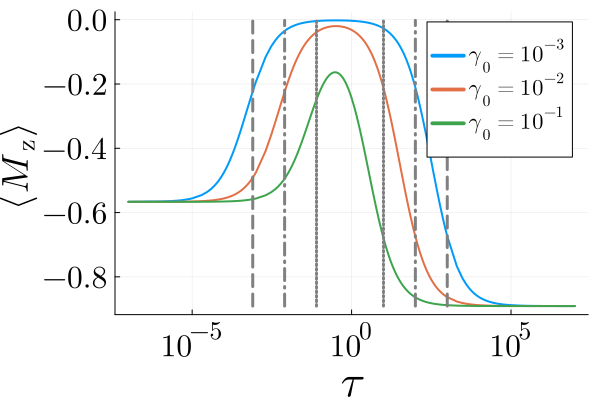

In [5]:
Plots.plot(label=false)
labels = [L"\gamma_0=10^{-3}",L"\gamma_0=10^{-2}",L"\gamma_0=10^{-1}"]

for i in eachindex(γ0s)
    Plots.plot!(τms, mzs[:, i], linewidth=2.0, label=labels[i], xaxis=:log10, xlabelfontsize=30, ylabelfontsize=25,
            xtickfontsize=20, ytickfontsize=20, legend=:topright, legendfontsize=15, fontfamily="Computer Modern")
end

linestyles = [:dash, :dashdot, :dot]

for i in eachindex(γ0s)
    Plots.plot!([1/γ0s[i], 1/γ0s[i]], [minimum(mzs), maximum(mzs)], color="gray", linestyle=linestyles[i], linewidth=3.0, label=false)
    Plots.plot!([γ0s[i]/hnorm^2, γ0s[i]/hnorm^2], [minimum(mzs), maximum(mzs)], color="gray", linestyle=linestyles[i], linewidth=3.0, label=false) 
end

Plots.ylabel!(L"\langle M_{\mathrm{z}}\rangle")
Plots.xlabel!(L"\tau")
Plots.plot!(label=false)

In [6]:
Plots.savefig("images/spin_example/spin_example_polarization.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/spin_example/spin_example_polarization.png"

In [7]:
γ0 = 1e-2

ξs=[π/16, π/8, π/4, π/2]
τms = [1e-7:1e-6:1e-5; 1e-5:1e-5:1e-3; 1e-3:1e-3:1.0; 1.0:0.2:100.0; 100.0:10.0:1000.0; 1e3:1e3:1e5; 1e5:1e5:1e7; ]
mzs = Array{Float64}(undef, length(τms), length(ξs))


for i in eachindex(ξs)
    for j in eachindex(τms)
        mzs[j, i]=sm.ss_matrix_weak(mx, my, mz, hx, hy, hz, γ0, τms[j], ξs[i])[3]
    end
end

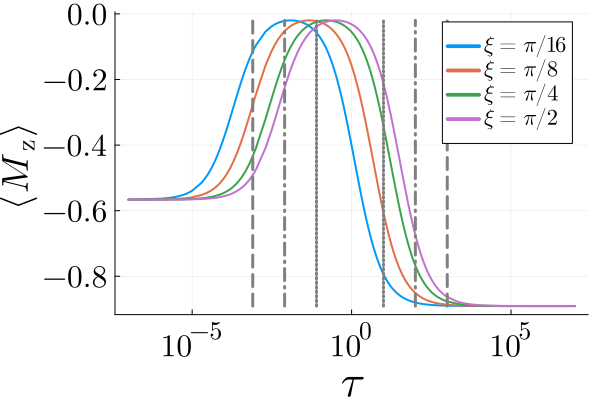

In [8]:
Plots.plot(label=false)
labels = [L"\xi=\pi/16", L"\xi=\pi/8", L"\xi=\pi/4", L"\xi=\pi/2"]

for i in eachindex(ξs)
    Plots.plot!(τms, mzs[:, i], linewidth=2.0, label=labels[i], xaxis=:log10, xlabelfontsize=30, ylabelfontsize=25,
            xtickfontsize=20, ytickfontsize=20, legend=:topright, legendfontsize=15, fontfamily="Computer Modern")
end

linestyles = [:dash, :dashdot, :dot]

for i in eachindex(γ0s)
    Plots.plot!([1/γ0s[i], 1/γ0s[i]], [minimum(mzs), maximum(mzs)], color="gray", linestyle=linestyles[i], linewidth=3.0, label=false)
    Plots.plot!([γ0s[i]/hnorm^2, γ0s[i]/hnorm^2], [minimum(mzs), maximum(mzs)], color="gray", linestyle=linestyles[i], linewidth=3.0, label=false) 
end

Plots.ylabel!(L"\langle M_{\mathrm{z}}\rangle")
Plots.xlabel!(L"\tau")
Plots.plot!(label=false)

In [9]:
Plots.savefig("images/spin_example/spin_example_polarization_weak.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/spin_example/spin_example_polarization_weak.png"

In [10]:
entropy = Array{Float64}(undef, length(τms), length(ξs))

for i in eachindex(ξs)
    for j in eachindex(τms)
        entropy[j, i]=sm.entropy_weak(mx, my, mz, hx, hy, hz, γ0, τms[j], ξs[i])
    end
end

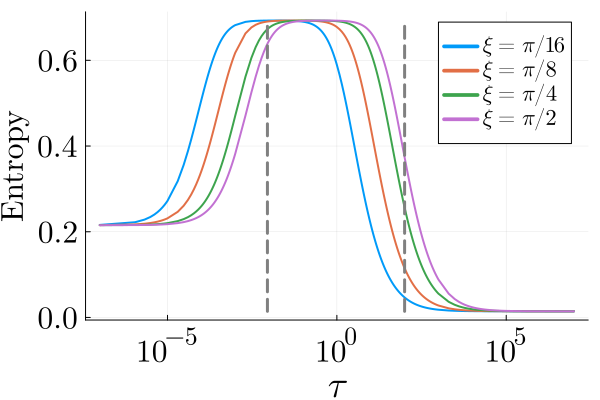

In [11]:
Plots.plot(label=false, size=(600, 400))
labels = [L"\xi=\pi/16", L"\xi=\pi/8", L"\xi=\pi/4", L"\xi=\pi/2"]

for i in eachindex(ξs)
    Plots.plot!(τms, entropy[:, i], linewidth=2.0, label=labels[i], xaxis=:log10, xlabelfontsize=25, ylabelfontsize=20,
            xtickfontsize=20, ytickfontsize=20, legend=:topright, legendfontsize=15, fontfamily="Computer Modern")
end


Plots.plot!([γ0/hnorm, γ0/hnorm], [minimum(entropy), maximum(entropy)], color="gray", linestyle=:dash, linewidth=3.0, label=false)
Plots.plot!([1/γ0, 1/γ0], [minimum(entropy), maximum(entropy)], color="gray", linestyle=:dash, linewidth=3.0, label=false)


Plots.ylabel!("Entropy")
Plots.xlabel!(L"\tau")
Plots.plot!(label=false)

In [12]:
Plots.savefig("images/spin_example/spin_example_entropy_weak.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/spin_example/spin_example_entropy_weak.png"